In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, optimizers, regularizers, models
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [2]:
data = pd.read_csv('ionosphere_data.csv', delimiter=',')
data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
for feature in data:
    print(feature)
    print(len(data[feature].unique()))

feature1
2
feature2
1
feature3
219
feature4
269
feature5
204
feature6
259
feature7
231
feature8
260
feature9
244
feature10
267
feature11
246
feature12
269
feature13
238
feature14
266
feature15
234
feature16
270
feature17
254
feature18
280
feature19
254
feature20
266
feature21
248
feature22
265
feature23
248
feature24
264
feature25
256
feature26
273
feature27
256
feature28
281
feature29
244
feature30
266
feature31
243
feature32
263
feature33
245
feature34
263
label
2


In [4]:

for feature in data:
    print(feature , len(data[feature].unique()))

feature1 2
feature2 1
feature3 219
feature4 269
feature5 204
feature6 259
feature7 231
feature8 260
feature9 244
feature10 267
feature11 246
feature12 269
feature13 238
feature14 266
feature15 234
feature16 270
feature17 254
feature18 280
feature19 254
feature20 266
feature21 248
feature22 265
feature23 248
feature24 264
feature25 256
feature26 273
feature27 256
feature28 281
feature29 244
feature30 266
feature31 243
feature32 263
feature33 245
feature34 263
label 2


In [5]:
data.drop(data.columns[1], inplace=True, axis=1)
data.describe()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [7]:
data.isnull().sum()

feature1     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [8]:
data['label'].describe()

count     351
unique      2
top         g
freq      225
Name: label, dtype: object

In [9]:
data['label'] = [1 if lbl == 'g' else 0 for lbl in data['label']]
data['label'].describe()

count    351.000000
mean       0.641026
std        0.480384
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: label, dtype: float64

In [10]:
training_data = data.sample(frac= 0.6, random_state=125)
testing_data = data.drop(training_data.index)
training_label = training_data.iloc[:,-1]
training_data = training_data.iloc[:,0:-1]
testing_label = testing_data.iloc[:,-1]
testing_data = testing_data.iloc[:,0:-1]

training_data.describe()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,...,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.909953,0.623455,0.016972,0.606826,0.104084,0.543575,0.077236,0.493908,0.211882,0.464048,...,0.411620,-0.054750,0.536748,-0.067042,0.401652,-0.035944,0.377411,-0.021653,0.359339,-0.016908
std,0.286930,0.532433,0.452559,0.515302,0.463105,0.494804,0.530510,0.519804,0.470419,0.568089,...,0.577991,0.512303,0.524863,0.534410,0.568283,0.504333,0.546140,0.511561,0.511753,0.476106
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.440970,-0.080395,0.437805,-0.041115,0.193600,-0.083610,0.083125,-0.050320,0.013730,...,0.004030,-0.297910,0.318695,-0.373510,0.000000,-0.237960,0.000000,-0.258435,0.000000,-0.241075
50%,1.000000,0.868890,0.008920,0.808040,0.013480,0.710630,0.000000,0.667250,0.033730,0.651640,...,0.556770,-0.033900,0.698110,-0.032800,0.524140,-0.000240,0.451140,-0.000150,0.421520,0.000000
75%,1.000000,1.000000,0.166370,1.000000,0.337165,0.969240,0.365770,0.952005,0.624475,0.953755,...,0.918365,0.161605,0.999155,0.147625,0.916120,0.114080,0.868140,0.182150,0.832195,0.129765
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
testing_data.describe()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.864286,0.668300,0.085667,0.592390,0.133681,0.559922,0.182848,0.538886,0.135322,0.494472,...,0.372796,-0.095959,0.549015,-0.073299,0.343469,-0.015795,0.314990,0.023123,0.334329,0.061786
std,0.343715,0.440720,0.422356,0.528398,0.458411,0.491003,0.500877,0.487830,0.501609,0.558032,...,0.580434,0.503512,0.504653,0.574686,0.587471,0.514992,0.607763,0.517263,0.540198,0.453964
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.506990,-0.029003,0.377720,-0.000358,0.254958,-0.013057,0.118900,-0.045515,0.046063,...,0.000000,-0.358925,0.279872,-0.513535,0.000000,-0.218622,0.000000,-0.222070,0.000000,-0.085115
50%,1.000000,0.874415,0.031315,0.818205,0.030495,0.773155,0.039345,0.737545,0.010235,0.688590,...,0.521495,-0.004775,0.737180,0.000200,0.472820,0.000000,0.433105,0.000000,0.407060,0.000000
75%,1.000000,1.000000,0.240998,1.000000,0.320568,0.968840,0.498565,0.952295,0.354205,0.961462,...,0.859710,0.144205,1.000000,0.159832,0.858873,0.185885,0.846942,0.207022,0.790303,0.236250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data.isnull().sum()

feature1     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [13]:
training_data = training_data.to_numpy()
training_label = training_label.to_numpy().astype('float32')
testing_data = testing_data.to_numpy()
testing_label = testing_label.to_numpy().astype('float32')

In [14]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(training_data.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,  activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2176      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 6,401
Trainable params: 6,401
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer = 'RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_label, validation_split=0.2, epochs=100, batch_size = 16)

Epoch 1/100
11/11 [==============================] - 2s 125ms/step - loss: 0.5996 - accuracy: 0.6753 - val_loss: 0.4853 - val_accuracy: 0.8372
Epoch 2/100
11/11 [==============================] - 0s 13ms/step - loss: 0.4938 - accuracy: 0.7686 - val_loss: 0.4234 - val_accuracy: 0.8837
Epoch 3/100
11/11 [==============================] - 0s 14ms/step - loss: 0.4670 - accuracy: 0.8154 - val_loss: 0.3824 - val_accuracy: 0.8837
Epoch 4/100
11/11 [==============================] - 0s 14ms/step - loss: 0.3642 - accuracy: 0.8960 - val_loss: 0.3431 - val_accuracy: 0.9070
Epoch 5/100
11/11 [==============================] - 0s 13ms/step - loss: 0.3826 - accuracy: 0.8547 - val_loss: 0.3070 - val_accuracy: 0.9535
Epoch 6/100
11/11 [==============================] - 0s 13ms/step - loss: 0.3235 - accuracy: 0.8945 - val_loss: 0.2816 - val_accuracy: 0.9767
Epoch 7/100
11/11 [==============================] - 0s 26ms/step - loss: 0.2929 - accuracy: 0.9257 - val_loss: 0.2520 - val_accuracy: 0.9767
Epoch

11/11 [==============================] - 0s 14ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.1225 - val_accuracy: 0.9767
Epoch 59/100
11/11 [==============================] - 0s 15ms/step - loss: 0.0170 - accuracy: 0.9926 - val_loss: 0.0957 - val_accuracy: 0.9767
Epoch 60/100
11/11 [==============================] - 0s 17ms/step - loss: 0.0137 - accuracy: 0.9973 - val_loss: 0.0918 - val_accuracy: 0.9767
Epoch 61/100
11/11 [==============================] - 0s 14ms/step - loss: 0.0218 - accuracy: 0.9936 - val_loss: 0.0668 - val_accuracy: 0.9767
Epoch 62/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0263 - accuracy: 0.9838 - val_loss: 0.0675 - val_accuracy: 0.9767
Epoch 63/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0858 - val_accuracy: 0.9767
Epoch 64/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0098 - accuracy: 0.9973 - val_loss: 0.1090 - val_accuracy: 0.9767
Epoch 65/100

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

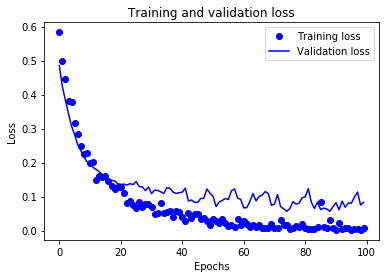

In [17]:
hist_dict = history.history
loss_values = hist_dict['loss']
val_loss_values = hist_dict['val_loss']
epochs = range(100)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


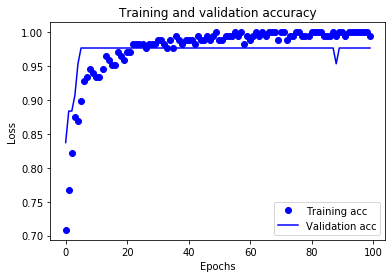

In [18]:
acc_values = hist_dict['accuracy']
val_acc_values = hist_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
evaluation = model.evaluate(testing_data, testing_label)
evaluation

5/5 [==============================] - 0s 4ms/step - loss: 0.4040 - accuracy: 0.9357


[0.40398627519607544, 0.9357143044471741]

In [20]:
predict=model.predict(testing_data)
pred_y = (predict > 0.5)
tf.math.confusion_matrix(
    testing_label, pred_y, num_classes=2, weights=None, dtype=tf.dtypes.int32,
    name=None
)

np.count_nonzero(pred_y)

92